In [3]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler



In [4]:
Data = pd.read_csv(r"/workspaces/Proyecto_Knn_Players/Data Posición/df_delanteros_medias.csv")
pd.set_option('display.max_columns', None)

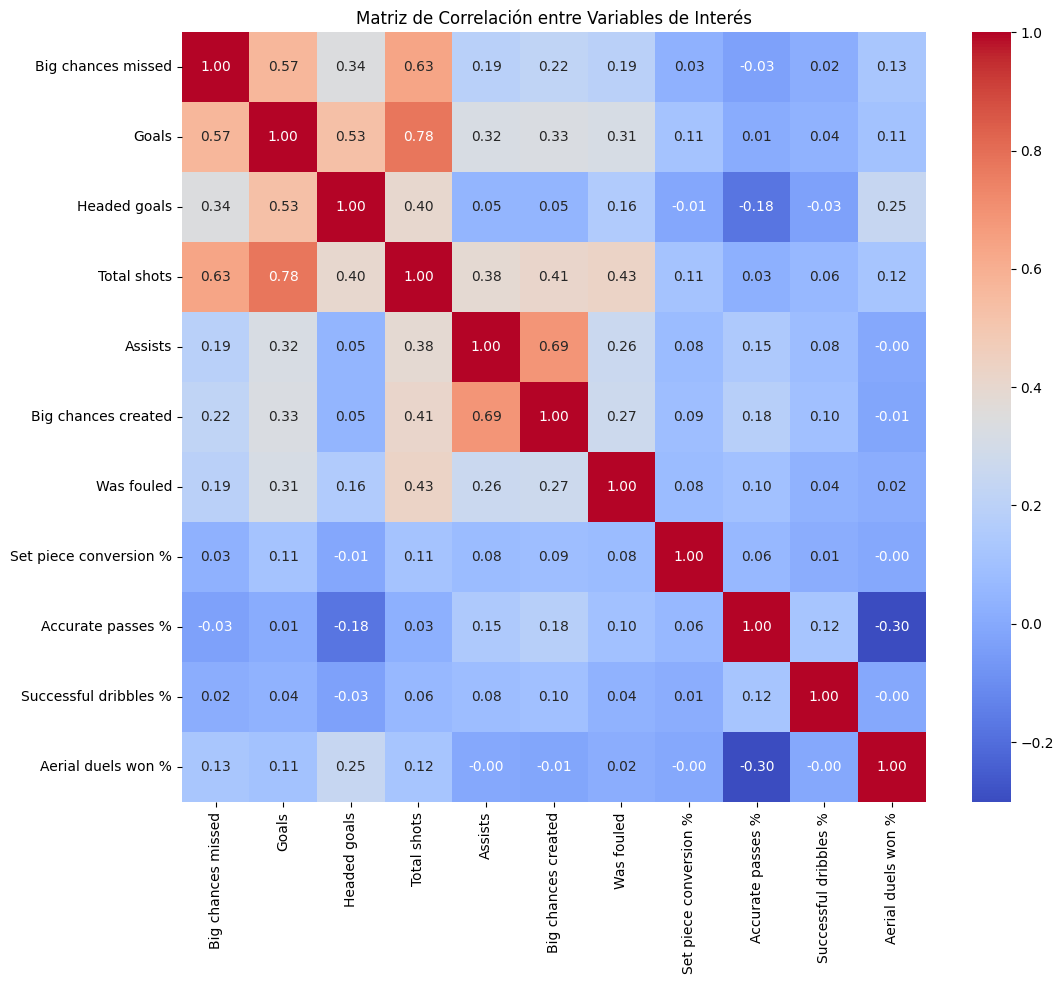

In [5]:


#Seleccionar las variables de interés
variables_interes = ['Big chances missed','Goals','Headed goals','Total shots','Assists','Big chances created','Was fouled','Set piece conversion %','Accurate passes %','Successful dribbles %','Aerial duels won %']

# Crear un nuevo DataFrame con solo las variables de interés
df_interes = Data[variables_interes]

# Calcular la matriz de correlación
correlacion = df_interes.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables de Interés')
plt.show()


In [6]:
Data

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Interceptions,Big chances created,Assists,Accurate passes %,Aerial duels won %,Total duels won %,Was fouled,Appearances,Age Range,Position,League,Level
0,Ronie Carrillo,0.600000,0.270000,53.330000,4.000000,0.00000,0.000000,0.130000,0.200000,0.270000,67.22000,43.880000,41.950000,1.130000,15.000000,2.0,4.0,Ecuador Serie A,3.0
1,Michael Hoyos,0.500000,0.170000,30.770000,2.790000,0.17000,0.000000,0.250000,0.250000,0.170000,79.12000,54.050000,44.830000,1.380000,24.000000,3.0,4.0,Ecuador Serie A,3.0
2,Jean Carlos Blanco,0.650000,0.250000,63.640000,2.000000,0.25000,0.000000,0.100000,0.050000,0.100000,71.90000,41.770000,40.540000,0.650000,20.000000,3.0,4.0,Ecuador Serie A,3.0
3,Junior Sornoza,0.120000,0.190000,50.000000,2.000000,0.00000,0.000000,0.120000,0.120000,0.120000,85.36000,23.080000,47.870000,0.770000,26.000000,2.0,4.0,Ecuador Serie A,3.0
4,Jeison Medina,0.530000,0.130000,33.330000,1.670000,0.20000,0.000000,0.070000,0.130000,0.200000,79.57000,42.310000,44.300000,1.200000,15.000000,2.0,4.0,Ecuador Serie A,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,Daniel Juárez,0.000000,0.130000,37.500000,0.940000,0.00000,0.000000,0.190000,0.000000,0.060000,65.14000,41.940000,36.630000,0.310000,16.000000,1.0,4.0,Argentina LPF,2.0
3416,Djorkaeff Reasco,0.060000,0.060000,41.670000,0.890000,0.00000,0.000000,0.060000,0.000000,0.000000,59.66000,34.040000,30.930000,0.390000,18.000000,1.0,4.0,Argentina LPF,2.0
3417,Junior Marabel,0.000000,0.220000,57.140000,0.670000,0.00000,0.000000,0.000000,0.000000,0.000000,59.62000,40.680000,42.860000,0.500000,18.000000,2.0,4.0,Argentina LPF,2.0
3418,Ignacio Maestro Puch,0.000000,0.060000,45.450000,0.350000,0.00000,0.000000,0.000000,0.000000,0.000000,69.12000,10.000000,27.270000,0.290000,17.000000,1.0,4.0,Argentina LPF,2.0


In [7]:
Data = Data.fillna(0)

In [8]:
Data.columns

Index(['Name', 'Goals', 'Big chances missed', 'Successful dribbles %',
       'Total shots', 'Headed goals', 'Set piece conversion %',
       'Interceptions', 'Big chances created', 'Assists', 'Accurate passes %',
       'Aerial duels won %', 'Total duels won %', 'Was fouled', 'Appearances',
       'Age Range', 'Position', 'League', 'Level'],
      dtype='object')

In [9]:
Data

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Interceptions,Big chances created,Assists,Accurate passes %,Aerial duels won %,Total duels won %,Was fouled,Appearances,Age Range,Position,League,Level
0,Ronie Carrillo,0.600000,0.270000,53.330000,4.000000,0.00000,0.000000,0.130000,0.200000,0.270000,67.22000,43.880000,41.950000,1.130000,15.000000,2.0,4.0,Ecuador Serie A,3.0
1,Michael Hoyos,0.500000,0.170000,30.770000,2.790000,0.17000,0.000000,0.250000,0.250000,0.170000,79.12000,54.050000,44.830000,1.380000,24.000000,3.0,4.0,Ecuador Serie A,3.0
2,Jean Carlos Blanco,0.650000,0.250000,63.640000,2.000000,0.25000,0.000000,0.100000,0.050000,0.100000,71.90000,41.770000,40.540000,0.650000,20.000000,3.0,4.0,Ecuador Serie A,3.0
3,Junior Sornoza,0.120000,0.190000,50.000000,2.000000,0.00000,0.000000,0.120000,0.120000,0.120000,85.36000,23.080000,47.870000,0.770000,26.000000,2.0,4.0,Ecuador Serie A,3.0
4,Jeison Medina,0.530000,0.130000,33.330000,1.670000,0.20000,0.000000,0.070000,0.130000,0.200000,79.57000,42.310000,44.300000,1.200000,15.000000,2.0,4.0,Ecuador Serie A,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,Daniel Juárez,0.000000,0.130000,37.500000,0.940000,0.00000,0.000000,0.190000,0.000000,0.060000,65.14000,41.940000,36.630000,0.310000,16.000000,1.0,4.0,Argentina LPF,2.0
3416,Djorkaeff Reasco,0.060000,0.060000,41.670000,0.890000,0.00000,0.000000,0.060000,0.000000,0.000000,59.66000,34.040000,30.930000,0.390000,18.000000,1.0,4.0,Argentina LPF,2.0
3417,Junior Marabel,0.000000,0.220000,57.140000,0.670000,0.00000,0.000000,0.000000,0.000000,0.000000,59.62000,40.680000,42.860000,0.500000,18.000000,2.0,4.0,Argentina LPF,2.0
3418,Ignacio Maestro Puch,0.000000,0.060000,45.450000,0.350000,0.00000,0.000000,0.000000,0.000000,0.000000,69.12000,10.000000,27.270000,0.290000,17.000000,1.0,4.0,Argentina LPF,2.0


In [10]:
columnas_a_dividir = ['Successful dribbles %', 'Accurate passes %', 'Aerial duels won %','Total duels won %']

# Divide todos los datos de las columnas por 10
Data[columnas_a_dividir] = Data[columnas_a_dividir] / 10

In [11]:
Data

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Interceptions,Big chances created,Assists,Accurate passes %,Aerial duels won %,Total duels won %,Was fouled,Appearances,Age Range,Position,League,Level
0,Ronie Carrillo,0.600000,0.270000,5.33300,4.000000,0.00000,0.000000,0.130000,0.200000,0.270000,6.722000,4.388000,4.195000,1.130000,15.000000,2.0,4.0,Ecuador Serie A,3.0
1,Michael Hoyos,0.500000,0.170000,3.07700,2.790000,0.17000,0.000000,0.250000,0.250000,0.170000,7.912000,5.405000,4.483000,1.380000,24.000000,3.0,4.0,Ecuador Serie A,3.0
2,Jean Carlos Blanco,0.650000,0.250000,6.36400,2.000000,0.25000,0.000000,0.100000,0.050000,0.100000,7.190000,4.177000,4.054000,0.650000,20.000000,3.0,4.0,Ecuador Serie A,3.0
3,Junior Sornoza,0.120000,0.190000,5.00000,2.000000,0.00000,0.000000,0.120000,0.120000,0.120000,8.536000,2.308000,4.787000,0.770000,26.000000,2.0,4.0,Ecuador Serie A,3.0
4,Jeison Medina,0.530000,0.130000,3.33300,1.670000,0.20000,0.000000,0.070000,0.130000,0.200000,7.957000,4.231000,4.430000,1.200000,15.000000,2.0,4.0,Ecuador Serie A,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,Daniel Juárez,0.000000,0.130000,3.75000,0.940000,0.00000,0.000000,0.190000,0.000000,0.060000,6.514000,4.194000,3.663000,0.310000,16.000000,1.0,4.0,Argentina LPF,2.0
3416,Djorkaeff Reasco,0.060000,0.060000,4.16700,0.890000,0.00000,0.000000,0.060000,0.000000,0.000000,5.966000,3.404000,3.093000,0.390000,18.000000,1.0,4.0,Argentina LPF,2.0
3417,Junior Marabel,0.000000,0.220000,5.71400,0.670000,0.00000,0.000000,0.000000,0.000000,0.000000,5.962000,4.068000,4.286000,0.500000,18.000000,2.0,4.0,Argentina LPF,2.0
3418,Ignacio Maestro Puch,0.000000,0.060000,4.54500,0.350000,0.00000,0.000000,0.000000,0.000000,0.000000,6.912000,1.000000,2.727000,0.290000,17.000000,1.0,4.0,Argentina LPF,2.0


In [12]:
Goals_media = Data["Goals"].mean()
Goals_min = Data["Goals"].min()
Goals_max = Data["Goals"].max()
print(Goals_media)
print(Goals_min)
print(Goals_max )
print("-"*100)
Headed_goals_media = Data["Headed goals"].mean()
Headed_goals_min = Data["Headed goals"].min()
Headed_goals_max = Data["Headed goals"].max()
print(Headed_goals_media)
print(Headed_goals_min)
print(Headed_goals_max)
print("-"*100)
Missed_media = Data["Big chances missed"].mean()
Missed_min = Data["Big chances missed"].min()
Missed_max = Data["Big chances missed"].max()
print(Missed_media)
print(Missed_min)
print(Missed_max)
print("-"*100)
Aerial_duels_won_media = Data["Aerial duels won %"].mean()
Aerial_duels_won_min = Data["Aerial duels won %"].min()
Aerial_duels_won__max = Data["Aerial duels won %"].max()
print(Aerial_duels_won_media)
print(Aerial_duels_won_min )
print(Aerial_duels_won__max)
print("-"*100)
Assists_media = Data["Assists"].mean()
Assists_min = Data["Assists"].min()
Assists_max = Data["Assists"].max()
print(Assists_media)
print(Assists_min)
print(Assists_max)
print("-"*100)
Big_chances_created_media = Data["Big chances created"].mean()
Big_chances_created_min = Data["Big chances created"].min()
Big_chances_created_max = Data["Big chances created"].max()
print(Big_chances_created_media)
print(Big_chances_created_min)
print(Big_chances_created_max)
print("-"*100)

0.18639075753144196
0.0
1.04
----------------------------------------------------------------------------------------------------
0.03045042410061421
0.0
0.43
----------------------------------------------------------------------------------------------------
0.16380228136882127
0.0
1.0
----------------------------------------------------------------------------------------------------
3.8112260894998533
0.0
10.0
----------------------------------------------------------------------------------------------------
0.07359169347762504
0.0
0.86
----------------------------------------------------------------------------------------------------
0.10629716291313249
0.0
0.94
----------------------------------------------------------------------------------------------------


In [13]:
Columna_habilidades = Data.columns.drop(["Name", "League"])
features = Data[Columna_habilidades]
# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()
# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)
# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=5)  # Buscamos 4 vecinos porque uno de ellos será el jugador mismo
# Ajusta el modelo a tus datos
model.fit(features_scaled)
caracteristicas_grafico = ['Big chances missed','Big chances created','Headed goals','Total shots','Goals','Was fouled','Assists','Set piece conversion %','Accurate passes %','Successful dribbles %','Total duels won %','Aerial duels won %']
# Función para normalizar nombres (ignorar mayúsculas y acentos)
def normalizar_nombre(nombre):
    nombre = nombre.lower()
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode("utf-8")
    return nombre


def buscar_jugadores_similares(nombre, caracteristicas_grafico):
    jugador = Data[Data['Name'] == nombre]
    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        jugador_scaled = scaler.transform(jugador[features.columns])  # Normalización para el modelo
        distancias, indices = model.kneighbors(jugador_scaled)
        jugadores_similares = Data.iloc[indices[0][0:]]  # Excluimos el primer resultado porque será el jugador mismo
        colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
        
        # Agregar 'Media' a la lista de jugadores similares antes de mostrar el DataFrame
        jugadores_similares = pd.concat([jugadores_similares, Data[Data['Name'] == 'Media']])
        display(jugadores_similares)

        # Escala todas las características de los jugadores similares
        fig = go.Figure()
        for i, row in enumerate(jugadores_similares[caracteristicas_grafico].values):  # Usamos los valores originales aquí
            fig.add_trace(go.Scatterpolar(
                r=row,
                theta=caracteristicas_grafico,
                fill='toself',
                name=jugadores_similares.iloc[i]['Name']
            ))
        fig.update_layout(
            autosize=False,
            width=800,
            height=800,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-2, 10]  # Ajusta este rango según tus datos
                )),
            showlegend=True
        )
        fig.show()
          # Configura una cuadrícula de subplots con 3 filas y 2 columnas
        fig, axs = plt.subplots(3, 2, figsize=(20, 12))  # Ajusta el tamaño según sea necesario
        # Gráfico de dispersión para Big chances missed
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Big chances missed'], color=colores[i % len(colores)], marker='o')
        for line in [Missed_max, Missed_media, Missed_min]:
            axs[0, 0].axhline(y=line, color='r', linestyle='--')
        axs[0, 0].set_title('Comparativa de Big chances missed de los jugadores similares')
        axs[0, 0].set_xticks(range(len(jugadores_similares)))
        axs[0, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 0].set_xlabel('Jugadores')
        axs[0, 0].set_ylabel('Big chances missed')
        # Gráfico de dispersión para la media Goals
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Goals'], color=colores[i % len(colores)], marker='o')
        for line in [Goals_max, Goals_media, Goals_min]:
            axs[0, 1].axhline(y=line, color='r', linestyle='--')
        axs[0, 1].set_title('Comparativa de Goals de los jugadores similares')
        axs[0, 1].set_xticks(range(len(jugadores_similares)))
        axs[0, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 1].set_xlabel('Jugadores')
        axs[0, 1].set_ylabel('Goals')
        # Gráfico de dispersión para la media Headed goals
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Headed goals'], color=colores[i % len(colores)], marker='o')
        for line in [Headed_goals_max, Headed_goals_media, Headed_goals_min]:
            axs[1, 0].axhline(y=line, color='r', linestyle='--')
        axs[1, 0].set_title('Comparativa de Headed goals de los jugadores similares')
        axs[1, 0].set_xticks(range(len(jugadores_similares)))
        axs[1, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 0].set_xlabel('Jugadores')
        axs[1, 0].set_ylabel('Headed goals')
        # Gráfico de dispersión para Aerial duels won %
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Aerial duels won %'], color=colores[i % len(colores)], marker='o')
        for line in [Aerial_duels_won__max, Aerial_duels_won_media, Aerial_duels_won_min]:
            axs[1, 1].axhline(y=line, color='r', linestyle='--')
        axs[1, 1].set_title('Comparativa de Aerial duels won  de los jugadores similares')
        axs[1, 1].set_xticks(range(len(jugadores_similares)))
        axs[1, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 1].set_xlabel('Jugadores')
        axs[1, 1].set_ylabel('Aerial duels won %')
        # Gráfico de dispersión para la media Assists
        for i, name in enumerate(jugadores_similares['Name']):
            axs[2, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Assists'], color=colores[i % len(colores)], marker='o')
        for line in [Assists_max, Assists_media, Assists_min]:
            axs[2, 0].axhline(y=line, color='r', linestyle='--')
        axs[2, 0].set_title('Comparativa de Assists de los jugadores similares')
        axs[2, 0].set_xticks(range(len(jugadores_similares)))
        axs[2, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[2, 0].set_xlabel('Jugadores')
        axs[2, 0].set_ylabel('Assists')
        # Gráfico de dispersión para la media Big chances created
        for i, name in enumerate(jugadores_similares['Name']):
            axs[2, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Big chances created'], color=colores[i % len(colores)], marker='o')
        for line in [Big_chances_created_max, Big_chances_created_media, Big_chances_created_min]:
            axs[2, 1].axhline(y=line, color='r', linestyle='--')
        axs[2, 1].set_title('Comparativa de Big chances created de los jugadores similares')
        axs[2, 1].set_xticks(range(len(jugadores_similares)))
        axs[2, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[2, 1].set_xlabel('Jugadores')
        axs[2, 1].set_ylabel('Big chances created')
        # Ajusta el layout para que no haya superposición de elementos
        plt.tight_layout()
        plt.show()
        return
        


,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Interceptions,Big chances created,Assists,Accurate passes %,Aerial duels won %,Total duels won %,Was fouled,Appearances,Age Range,Position,League,Level
2768,Sven Michel,0.140000,0.000000,2.50000,0.760000,0.00000,0.000000,0.000000,0.050000,0.050000,6.025000,3.472000,3.417000,0.190000,21.000000,3.0,4.0,Alemania Bundesliga 1,1.0
903,Chris Wood,0.120000,0.120000,3.33300,0.480000,0.00000,0.000000,0.080000,0.000000,0.000000,6.158000,4.719000,4.435000,0.280000,25.000000,3.0,4.0,Inglaterra Premier League,1.0
830,Tom Eaves,0.000000,0.050000,2.50000,0.600000,0.00000,0.000000,0.150000,0.100000,0.050000,5.405000,4.419000,3.464000,0.200000,20.000000,3.0,4.0,Inglaterra Championship,2.0
2781,Simon Zoller,0.110000,0.070000,5.00000,1.110000,0.00000,0.000000,0.220000,0.040000,0.070000,6.526000,4.286000,3.956000,0.300000,27.000000,3.0,4.0,Alemania Bundesliga 1,1.0
369,Kevin Volland,0.180000,0.060000,2.50000,0.880000,0.00000,0.000000,0.120000,0.120000,0.120000,5.842000,4.400000,4.024000,0.760000,17.000000,3.0,4.0,Francia Liga 1,2.0
3419,Media,0.186391,0.163802,4.50593,1.400687,0.03045,0.040129,0.189298,0.106297,0.073592,7.116802,3.811226,4.236448,0.884384,23.194501,0.0,0.0,0,0.0


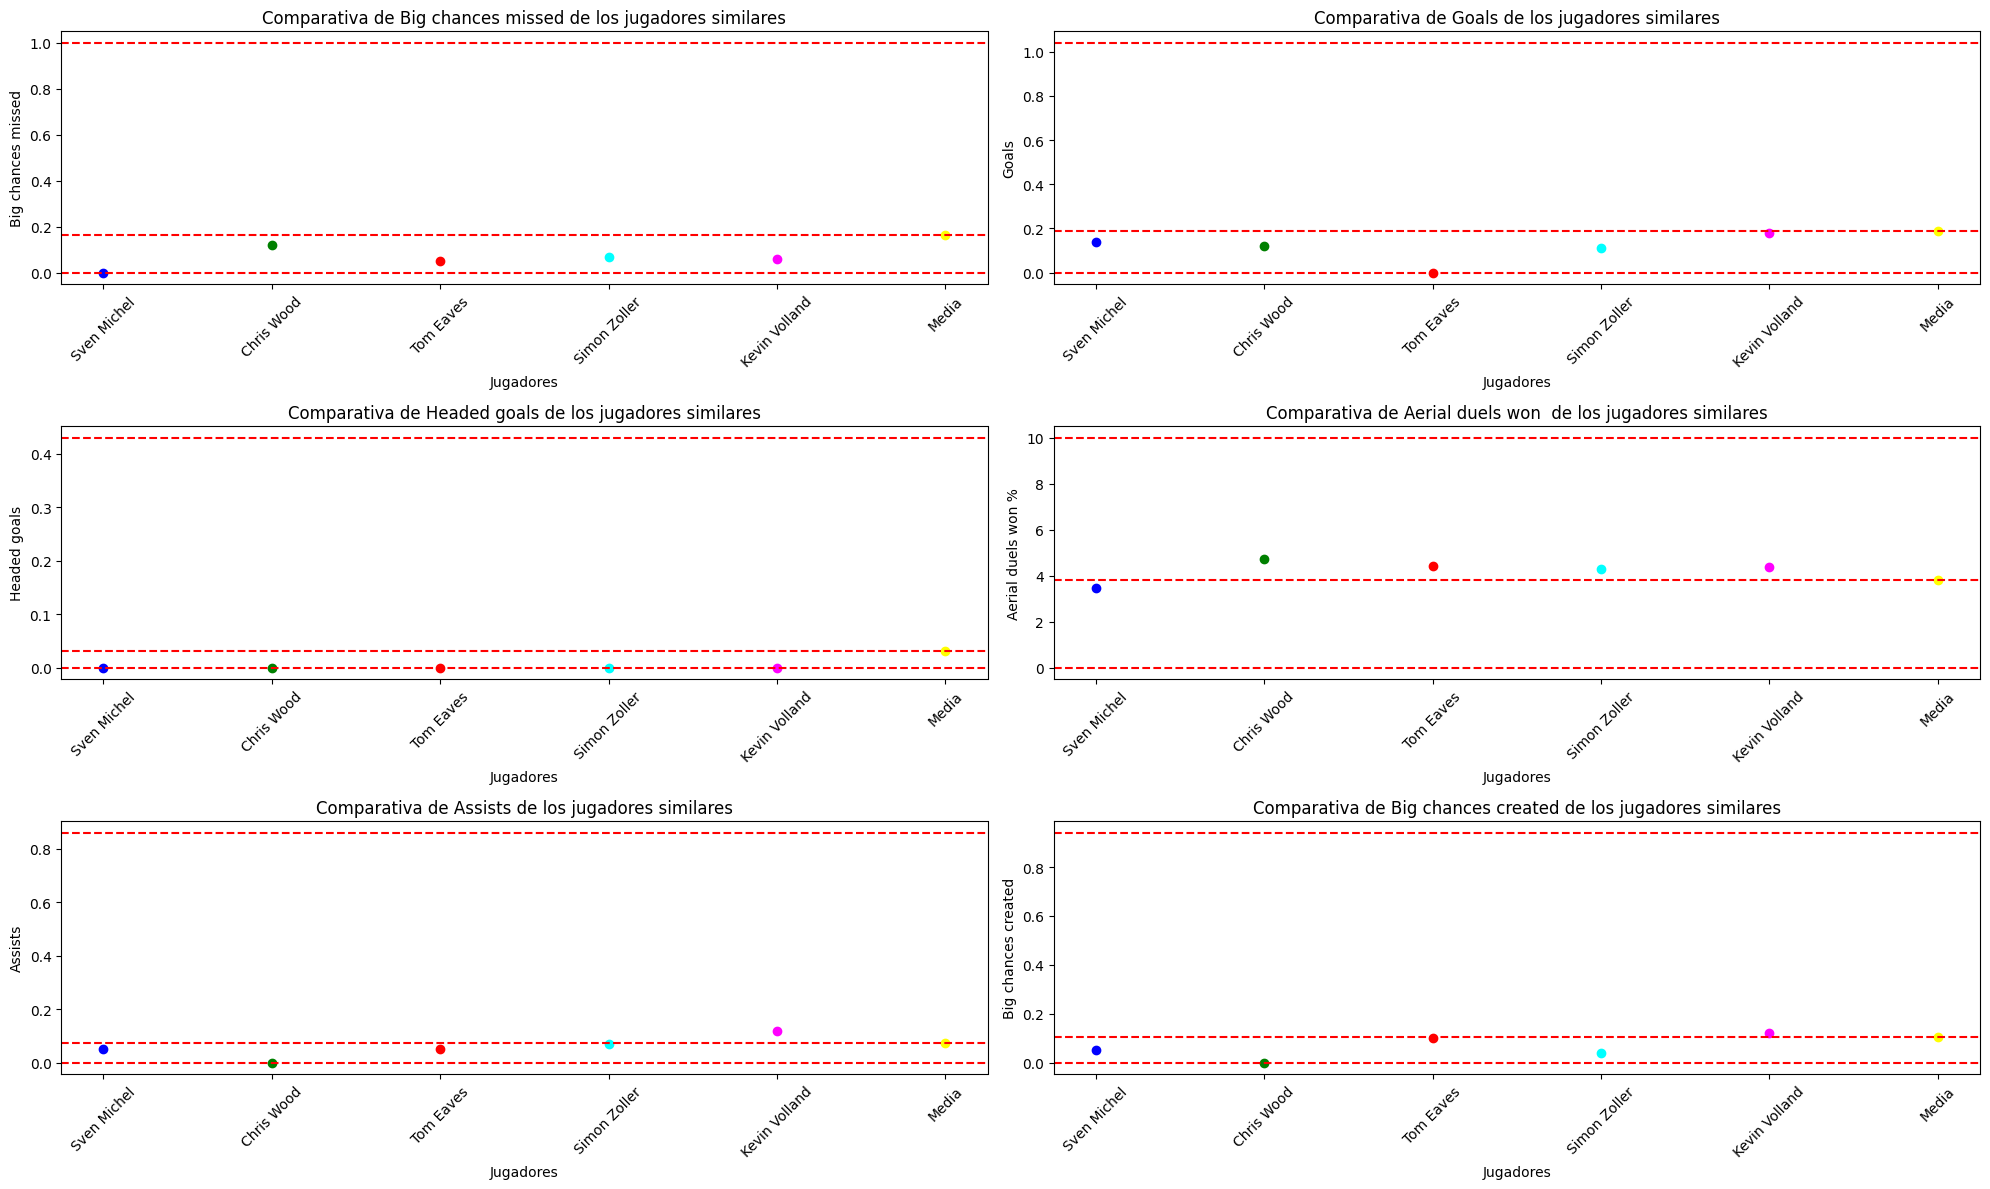

In [15]:
buscar_jugadores_similares('Sven Michel', caracteristicas_grafico)